Testing with f(x) = x^2


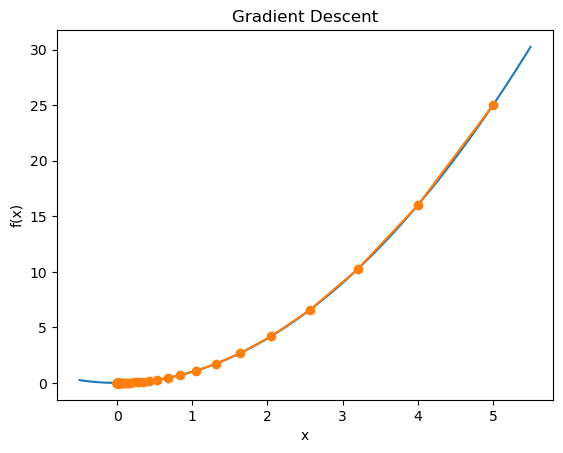

(0.0, 0.0)
Testing with f(x) = x^4 - 2x^2


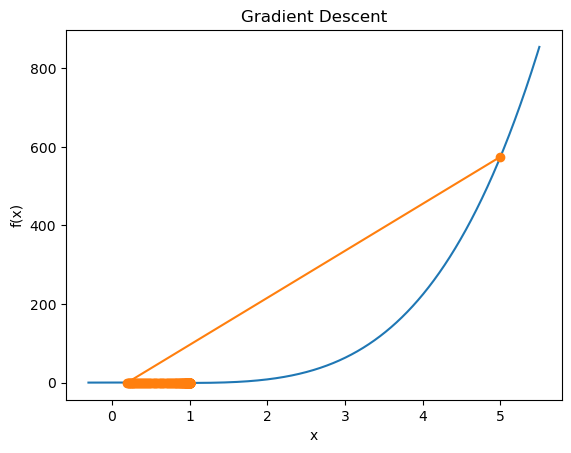

(1.0, -1.0)
Testing with funny_function


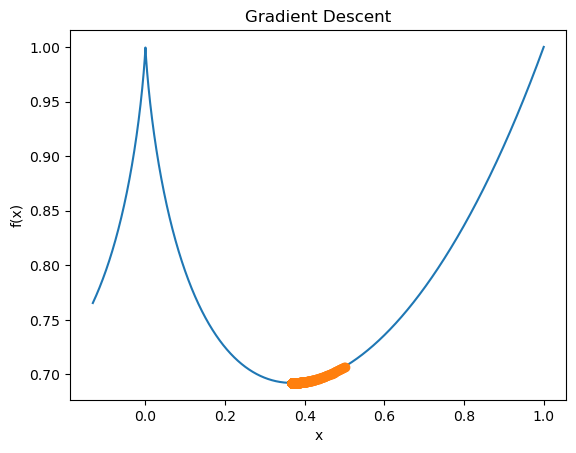

(0.368, 0.692)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent(f, learning_rate, initial_point):
    def deriv(f, base_point): #estimate the derivative of the function f at base_point using the symmetric approximation
        return (f(base_point + 10**(-10)) - f(base_point - 10**(-10))) / (2 * 10**(-10))
    
    x_coords = [initial_point]  # This list is where you will store the x_n's
    y_coords = [f(initial_point)]  # This list is where you will store the y_n's
    
    for _ in range(10000):  
        current_x = x_coords[-1]
        current_y = y_coords[-1]
        
        # Calculate the next point
        next_x = current_x - learning_rate * deriv(f, current_x)
        next_y = f(next_x)
        
        # Store the new point
        x_coords.append(next_x)
        y_coords.append(next_y)
        
        # Check for convergence (if the change is very small)
        if abs(next_x - current_x) < 1e-6:
            break
    
    # Plotting portion
    plot_range = np.linspace(min(x_coords) - 0.5, max(x_coords) + 0.5, 10000)  # A nice plot range to make it look good
    function_range = [f(i) for i in plot_range]
    
    plt.plot(plot_range, function_range)  # This plots the function f(x)
    plt.plot(x_coords, y_coords, marker='o')  # This will plot the sequence of points x_n, f(x_n)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent')
    plt.show()
    
    return round(x_coords[-1], 3), round(y_coords[-1], 3)  # Returns your last x_n and y_n, rounded to three decimal places

# Test the function with f(x) = x^2
def f1(x):
    return x**2

# Test the function with f(x) = x^4 - 2x^2
def f2(x):
    return x**4 - 2*x**2

# Test the function with the symmetrized version of x^x
def funny_function(x):
    if x > 0:
        return x**x
    elif x == 0:
        return 1
    else:
        return abs(x)**abs(x)

# Testing with f(x) = x^2
print("Testing with f(x) = x^2")
print(gradient_descent(f1, learning_rate=0.1, initial_point=5))

# Testing with f(x) = x^4 - 2x^2
print("Testing with f(x) = x^4 - 2x^2")
print(gradient_descent(f2, learning_rate=0.01, initial_point=5))

# Testing with the symmetrized version of x^x
print("Testing with funny_function")
print(gradient_descent(funny_function, learning_rate=0.01, initial_point=0.5))